In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#https://www.kaggle.com/code/anshigupta01/flight-price-prediction/notebook

In [ ]:
#importing data
df=pd.read_excel('data/flight_price_pred.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df_sorted = df.sort_values(by='Duration', ascending=False)
print(df_sorted.head(10))

                Airline Date_of_Journey   Source Destination  \
9798  Multiple carriers      27/06/2019    Delhi      Cochin   
5416  Multiple carriers      18/05/2019    Delhi      Cochin   
4307          Air India      15/05/2019  Kolkata    Banglore   
6208  Multiple carriers      21/03/2019    Delhi      Cochin   
212   Multiple carriers       6/06/2019    Delhi      Cochin   
7621          Air India      18/05/2019  Kolkata    Banglore   
4878          Air India       6/05/2019  Kolkata    Banglore   
5640          Air India      12/03/2019   Mumbai   Hyderabad   
4857          Air India      24/03/2019  Kolkata    Banglore   
2123          Air India      12/05/2019  Kolkata    Banglore   

                      Route Dep_Time Arrival_Time Duration Total_Stops  \
9798        DEL → HYD → COK    07:05        16:10    9h 5m      1 stop   
5416        DEL → HYD → COK    07:05        16:10    9h 5m      1 stop   
4307        CCU → BOM → BLR    09:25        18:30    9h 5m      1 stop   

Can see all Date_of_journey in 2019 so only extract month and day

In [5]:
df['duration_timedelta'] = pd.to_timedelta(df['Duration'])
print(df.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

  duration_timedelta  
0    0 days 02:50:00  
1    0 days 07:25:00  
2    0 days 19:00:00  


In [6]:
df_sorted = df.sort_values(by='duration_timedelta', ascending=False)
print(df_sorted.head())

           Airline Date_of_Journey   Source Destination  \
10456  Jet Airways       6/03/2019    Delhi      Cochin   
1067   Jet Airways       3/03/2019    Delhi      Cochin   
8409   Jet Airways      21/03/2019    Delhi      Cochin   
5953   Jet Airways      21/03/2019    Delhi      Cochin   
7906     Air India      24/03/2019  Kolkata    Banglore   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
10456  DEL → AMD → BOM → COK    19:10  18:50 08 Mar  47h 40m     2 stops   
1067   DEL → IDR → BOM → COK    05:25  04:25 05 Mar      47h     2 stops   
8409   DEL → JAI → BOM → COK    09:40  04:25 23 Mar  42h 45m     2 stops   
5953   DEL → IDR → BOM → COK    10:20  04:25 23 Mar   42h 5m     2 stops   
7906   CCU → GAU → DEL → BLR    05:55  23:15 25 Mar  41h 20m     2 stops   

      Additional_Info  Price duration_timedelta  
10456         No info  20694    1 days 23:40:00  
1067          No info  20064    1 days 23:00:00  
8409          No info  12819    1 days

In [7]:
df['Dept full time'] = df['Date_of_Journey'] + ' ' + df['Dep_Time']
print(df.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

  duration_timedelta    Dept full time  
0    0 days 02:50:00  24/03/2019 22:20  
1    0 day

In [8]:
df['timestamp_dept_time'] = pd.to_datetime(df['Dept full time'], format="%d/%m/%Y %H:%M")
print(df.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

  duration_timedelta    Dept full time timestamp_dept_time  
0    0 days 02:50:00  24/03/201

In [9]:
df['timestamp_arrival_time'] = df['timestamp_dept_time'] + df['duration_timedelta']
print(df.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

  duration_timedelta    Dept full time timestamp_dept_time  \
0    0 days 02:50:00  24/03/20

In [10]:
# drop columns I no longer need
df.drop(columns=['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Dept full time'], axis=1, inplace=True)
print(df.head())

       Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price duration_timedelta timestamp_dept_time  \
0    non-stop         No info   3897    0 days 02:50:00 2019-03-24 22:20:00   
1     2 stops         No info   7662    0 days 07:25:00 2019-05-01 05:50:00   
2     2 stops         No info  13882    0 days 19:00:00 2019-06-09 09:25:00   
3      1 stop         No info   6218    0 days 05:25:00 2019-05-12 18:05:00   
4      1 stop         No info  13302    0 days 04:45:00 2019-03-01 16:50:00   

  timestamp_arrival_time  
0    2019-03-25 01:10:00  
1    2019-05-01 13:15:00  
2    2019-0

In [11]:
df.shape

(10683, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Airline                 10683 non-null  object         
 1   Source                  10683 non-null  object         
 2   Destination             10683 non-null  object         
 3   Route                   10682 non-null  object         
 4   Duration                10683 non-null  object         
 5   Total_Stops             10682 non-null  object         
 6   Additional_Info         10683 non-null  object         
 7   Price                   10683 non-null  int64          
 8   duration_timedelta      10683 non-null  timedelta64[ns]
 9   timestamp_dept_time     10683 non-null  datetime64[ns] 
 10  timestamp_arrival_time  10683 non-null  datetime64[ns] 
dtypes: datetime64[ns](2), int64(1), object(7), timedelta64[ns](1)
memory usage: 918.2+ KB


In [13]:
df.isnull().sum()

Airline                   0
Source                    0
Destination               0
Route                     1
Duration                  0
Total_Stops               1
Additional_Info           0
Price                     0
duration_timedelta        0
timestamp_dept_time       0
timestamp_arrival_time    0
dtype: int64

Can drop the rows with missing value as very small percentage of dataset

In [ ]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum() # check again there are no missing values

Airline                   0
Source                    0
Destination               0
Route                     0
Duration                  0
Total_Stops               0
Additional_Info           0
Price                     0
duration_timedelta        0
timestamp_dept_time       0
timestamp_arrival_time    0
dtype: int64

In [16]:
df.duplicated().sum() # check for duplicates

222

In [17]:
duplicate_rows = df.duplicated()
print(df[duplicate_rows])

           Airline    Source Destination                  Route Duration  \
683    Jet Airways     Delhi      Cochin  DEL → NAG → BOM → COK  13h 50m   
1061     Air India     Delhi      Cochin  DEL → GOI → BOM → COK  21h 15m   
1348     Air India     Delhi      Cochin  DEL → HYD → BOM → COK      26h   
1418   Jet Airways     Delhi      Cochin  DEL → JAI → BOM → COK  22h 55m   
1674        IndiGo  Banglore   New Delhi              BLR → DEL   2h 55m   
...            ...       ...         ...                    ...      ...   
10594  Jet Airways     Delhi      Cochin  DEL → AMD → BOM → COK  13h 30m   
10616  Jet Airways     Delhi      Cochin  DEL → JAI → BOM → COK  26h 55m   
10634  Jet Airways     Delhi      Cochin  DEL → JAI → BOM → COK  26h 55m   
10672  Jet Airways     Delhi      Cochin  DEL → AMD → BOM → COK  19h 55m   
10673  Jet Airways     Delhi      Cochin  DEL → AMD → BOM → COK      15h   

      Total_Stops              Additional_Info  Price duration_timedelta  \
683       2

In [18]:
df = df.drop_duplicates() # there are duplicate rows, keep the first occurance

In [19]:
df.duplicated().sum() # check again there are no duplicates

0

In [20]:
df.nunique() # check number of unique values in each column

Airline                     12
Source                       5
Destination                  6
Route                      128
Duration                   368
Total_Stops                  5
Additional_Info             10
Price                     1870
duration_timedelta         368
timestamp_dept_time       4158
timestamp_arrival_time    4273
dtype: int64

In [21]:
df.describe()

,Price,duration_timedelta,timestamp_dept_time,timestamp_arrival_time
count,10460.000000,10460,10460,10460
mean,9027.360421,0 days 10:29:52.170172084,2019-05-05 02:45:53.632887296,2019-05-05 13:15:45.803059200
min,1759.000000,0 days 00:05:00,2019-03-01 00:20:00,2019-03-01 04:00:00
25%,5224.000000,0 days 02:50:00,2019-03-27 17:33:45,2019-03-28 04:25:00
50%,8266.000000,0 days 08:25:00,2019-05-15 08:25:00,2019-05-15 19:00:00
75%,12346.250000,0 days 15:10:00,2019-06-06 05:56:15,2019-06-06 11:50:00
max,79512.000000,1 days 23:40:00,2019-06-27 23:55:00,2019-06-29 04:25:00
std,4625.057376,0 days 08:20:42.392250434,NaN,NaN


In [22]:
df.dtypes # check datatypes

Airline                            object
Source                             object
Destination                        object
Route                              object
Duration                           object
Total_Stops                        object
Additional_Info                    object
Price                               int64
duration_timedelta        timedelta64[ns]
timestamp_dept_time        datetime64[ns]
timestamp_arrival_time     datetime64[ns]
dtype: object

In [ ]:
df_sorted = df.sort_values(by='timestamp_arrival_time', ascending=False)
print(df_sorted.head(5))

          Airline Source Destination                  Route Duration  \
4091  Jet Airways  Delhi      Cochin  DEL → AMD → BOM → COK  29h 20m   
3319  Jet Airways  Delhi      Cochin  DEL → AMD → BOM → COK  29h 20m   
3826  Jet Airways  Delhi      Cochin  DEL → AMD → BOM → COK  29h 20m   
8613    Air India  Delhi      Cochin  DEL → AMD → BOM → COK  26h 35m   
4798    Air India  Delhi      Cochin  DEL → JAI → BOM → COK  24h 30m   

     Total_Stops              Additional_Info  Price duration_timedelta  \
4091     2 stops                      No info  15339    1 days 05:20:00   
3319     2 stops                      No info  12819    1 days 05:20:00   
3826     2 stops  In-flight meal not included  11150    1 days 05:20:00   
8613     2 stops                      No info   9653    1 days 02:35:00   
4798     2 stops                      No info  11942    1 days 00:30:00   

     timestamp_dept_time timestamp_arrival_time  
4091 2019-06-27 23:05:00    2019-06-29 04:25:00  
3319 2019-06-27 

In [24]:
df['dept_day'] = df['timestamp_dept_time'].dt.day
df['dept_month'] = df['timestamp_dept_time'].dt.month
df['dept_hour'] = df['timestamp_dept_time'].dt.hour
df['dept_minute'] = df['timestamp_dept_time'].dt.minute

df['arrival_day'] = df['timestamp_arrival_time'].dt.day
df['arrival_month'] = df['timestamp_arrival_time'].dt.month
df['arrival_hour'] = df['timestamp_arrival_time'].dt.hour
df['arrival_minute'] = df['timestamp_arrival_time'].dt.minute

df['duration_hours'] = df['duration_timedelta'].dt.components.hours
df['duration_minutes'] = df['duration_timedelta'].dt.components.minutes

print(df.head())

       Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price duration_timedelta timestamp_dept_time  \
0    non-stop         No info   3897    0 days 02:50:00 2019-03-24 22:20:00   
1     2 stops         No info   7662    0 days 07:25:00 2019-05-01 05:50:00   
2     2 stops         No info  13882    0 days 19:00:00 2019-06-09 09:25:00   
3      1 stop         No info   6218    0 days 05:25:00 2019-05-12 18:05:00   
4      1 stop         No info  13302    0 days 04:45:00 2019-03-01 16:50:00   

   ... dept_day  dept_month  dept_hour  dept_minute  arrival_day  \
0  ...       24         

In [25]:
# drop unneeded columns
# drop columns I no longer need
df.drop(columns=['Duration', 'timestamp_dept_time', 'timestamp_arrival_time', 'duration_timedelta'], axis=1, inplace=True)
print(df.head())

       Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  dept_day  dept_month  dept_hour  dept_minute  \
0         No info   3897        24           3         22           20   
1         No info   7662         1           5          5           50   
2         No info  13882         9           6          9           25   
3         No info   6218        12           5         18            5   
4         No info  13302         1           3         16           50   

   arrival_day  arrival_month  arrival_hour  arrival_minute  duration_hours  \
0           25           

In [26]:
df.dtypes # check datatypes again

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
dept_day             int32
dept_month           int32
dept_hour            int32
dept_minute          int32
arrival_day          int32
arrival_month        int32
arrival_hour         int32
arrival_minute       int32
duration_hours       int64
duration_minutes     int64
dtype: object

In [27]:
categorical_features=[column for column in df.columns if df[column].dtype=='object']
categorical_features

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [28]:
numerical_features=[column for column in df.columns if df[column].dtype!='object']
numerical_features

['Price',
 'dept_day',
 'dept_month',
 'dept_hour',
 'dept_minute',
 'arrival_day',
 'arrival_month',
 'arrival_hour',
 'arrival_minute',
 'duration_hours',
 'duration_minutes']

In [29]:
# 'Airline', 'Source', 'Destination' are nominal - check if they have relevance on dependent var price.
df['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

<Axes: xlabel='Airline', ylabel='Price'>

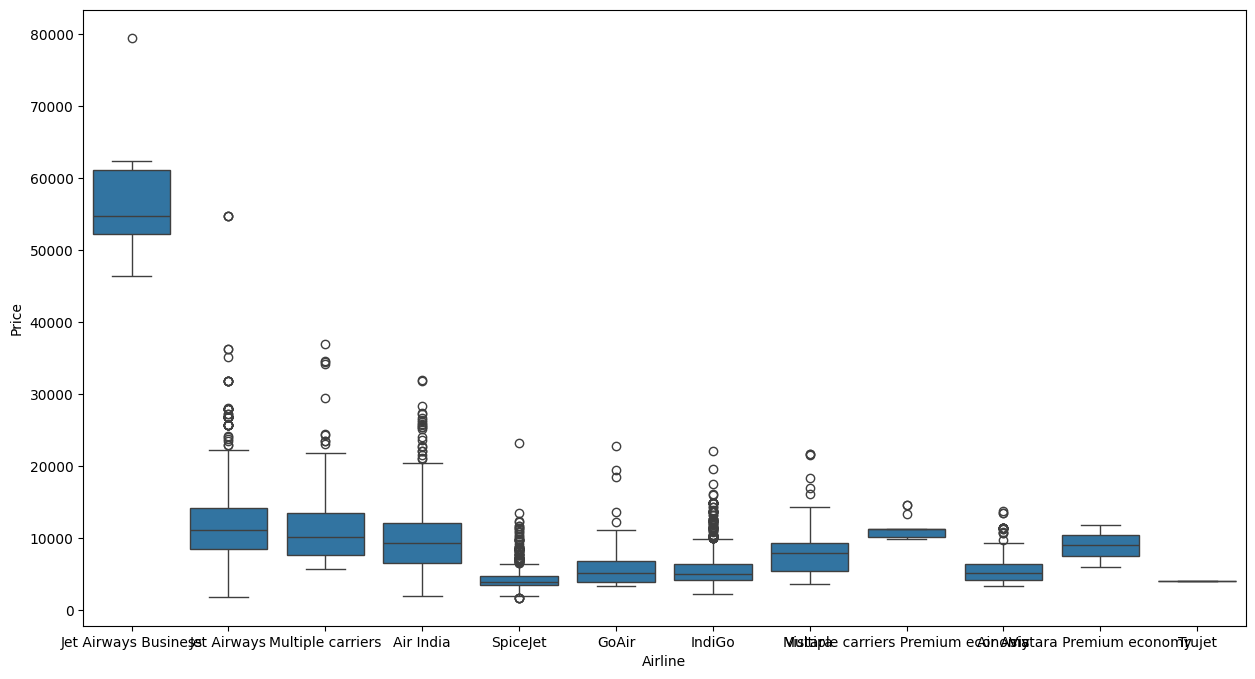

In [30]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

In [31]:
df['Source'].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2177
Mumbai       697
Chennai      381
Name: count, dtype: int64

<Figure size 1500x1500 with 0 Axes>

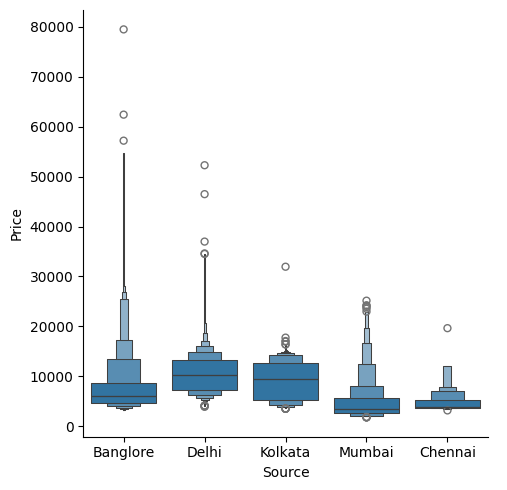

In [32]:
plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')

In [33]:
df['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     912
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

<Axes: xlabel='Destination', ylabel='Price'>

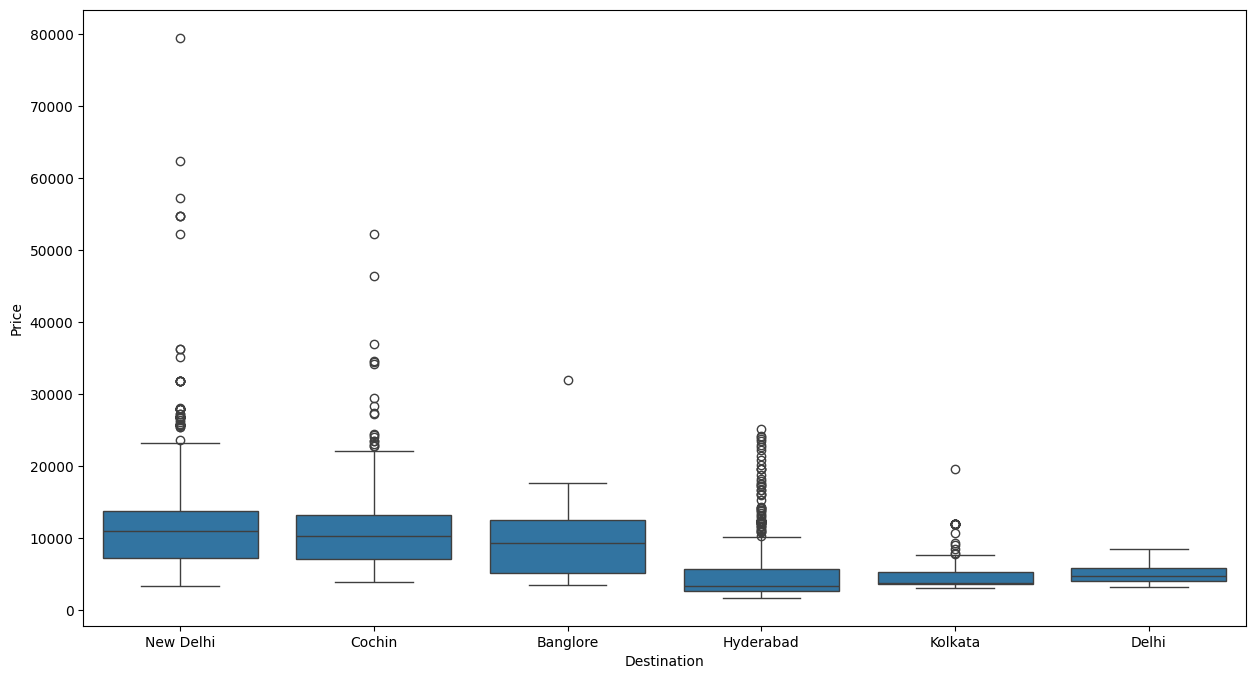

In [34]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [35]:
# one hot encoding Airline column
Airline=pd.get_dummies(df['Airline'],drop_first=True, dtype=int)
print(Airline.head())

   Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       1            0                     0   
1          1      0       0            0                     0   
2          0      0       0            1                     0   
3          0      0       1            0                     0   
4          0      0       1            0                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                  0                                  0         0       0   
1                  0                                  0         0       0   
2                  0                                  0         0       0   
3                  0                                  0         0       0   
4                  0                                  0         0       0   

   Vistara  Vistara Premium economy  
0        0                        0  
1        0                        0  
2        0                

In [36]:
# one hot encoding source column
Source=pd.get_dummies(df['Source'],drop_first=True, dtype=int)
print(Source.head())

   Chennai  Delhi  Kolkata  Mumbai
0        0      0        0       0
1        0      0        1       0
2        0      1        0       0
3        0      0        1       0
4        0      0        0       0


In [37]:
# one hot encoding destination column
Destination=pd.get_dummies(df['Destination'],drop_first=True, dtype=int)
print(Destination.head())

   Cochin  Delhi  Hyderabad  Kolkata  New Delhi
0       0      0          0        0          1
1       0      0          0        0          0
2       1      0          0        0          0
3       0      0          0        0          0
4       0      0          0        0          1


In [38]:
# examine route feature
df['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1534
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [39]:
# split each route into seperate column
df['Route1']=df['Route'].str.split('→').str[0]
df['Route2']=df['Route'].str.split('→').str[1]
df['Route3']=df['Route'].str.split('→').str[2]
df['Route4']=df['Route'].str.split('→').str[3]
df['Route5']=df['Route'].str.split('→').str[4]

df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,dept_day,dept_month,dept_hour,...,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,...,3,1,10,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,...,5,13,15,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,...,6,4,25,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,...,5,23,30,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,...,3,21,35,4,45,BLR,NAG,DEL,NaN,NaN


In [40]:
# drop route column
df.drop(columns=['Route'], axis=1, inplace=True)
print(df.head())

       Airline    Source Destination Total_Stops Additional_Info  Price  \
0       IndiGo  Banglore   New Delhi    non-stop         No info   3897   
1    Air India   Kolkata    Banglore     2 stops         No info   7662   
2  Jet Airways     Delhi      Cochin     2 stops         No info  13882   
3       IndiGo   Kolkata    Banglore      1 stop         No info   6218   
4       IndiGo  Banglore   New Delhi      1 stop         No info  13302   

   dept_day  dept_month  dept_hour  dept_minute  ...  arrival_month  \
0        24           3         22           20  ...              3   
1         1           5          5           50  ...              5   
2         9           6          9           25  ...              6   
3        12           5         18            5  ...              5   
4         1           3         16           50  ...              3   

   arrival_hour  arrival_minute  duration_hours  duration_minutes  Route1  \
0             1              10              

In [41]:
df.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             0
Additional_Info         0
Price                   0
dept_day                0
dept_month              0
dept_hour               0
dept_minute             0
arrival_day             0
arrival_month           0
arrival_hour            0
arrival_minute          0
duration_hours          0
duration_minutes        0
Route1                  0
Route2                  0
Route3               3473
Route4               9098
Route5              10416
dtype: int64

In [42]:
for i in ['Route3', 'Route4', 'Route5']: # fill NA with None
    df[i].fillna('None',inplace=True)

In [43]:
df.isnull().sum() # Check na again

Airline             0
Source              0
Destination         0
Total_Stops         0
Additional_Info     0
Price               0
dept_day            0
dept_month          0
dept_hour           0
dept_minute         0
arrival_day         0
arrival_month       0
arrival_hour        0
arrival_minute      0
duration_hours      0
duration_minutes    0
Route1              0
Route2              0
Route3              0
Route4              0
Route5              0
dtype: int64

In [46]:
# Applying label encoder
# use label encoding since many categories for the routes
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']: # encode values into numbers
    df[i]=encoder.fit_transform(df[i])

df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,dept_day,dept_month,dept_hour,dept_minute,...,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,...,3,1,10,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,...,5,13,15,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,...,6,4,25,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,...,5,23,30,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,...,3,21,35,4,45,0,34,8,13,5


In [47]:
# examine total_stop
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [48]:
# since ordinal data, encode as number
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,dept_day,dept_month,dept_hour,dept_minute,...,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,...,3,1,10,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,...,5,13,15,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,...,6,4,25,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,...,5,23,30,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,...,3,21,35,4,45,0,34,8,13,5


In [49]:
# examine add_info column
print(df['Additional_Info'].unique())

['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


In [50]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8180
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

<Figure size 5000x1500 with 0 Axes>

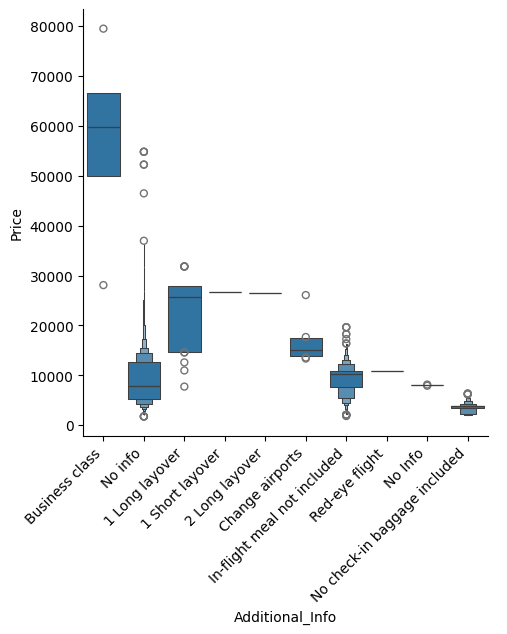

In [51]:
plt.figure(figsize=(50,15))

g = sns.catplot(x='Additional_Info',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')
g.set_xticklabels(rotation=45, ha="right")
plt.show()

In [52]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,dept_day,dept_month,dept_hour,dept_minute,...,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,...,3,1,10,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,...,5,13,15,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,...,6,4,25,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,...,5,23,30,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,...,3,21,35,4,45,0,34,8,13,5


In [ ]:
# not enough entries for some values and 'no info' doesn't specify what, so also drop column Additional_Info
df.drop(columns=['Airline', 'Source', 'Destination', 'Additional_Info'], axis=1, inplace=True)
print(df.head())

   Total_Stops  Price  dept_day  dept_month  dept_hour  dept_minute  \
0            0   3897        24           3         22           20   
1            2   7662         1           5          5           50   
2            2  13882         9           6          9           25   
3            1   6218        12           5         18            5   
4            1  13302         1           3         16           50   

   arrival_day  arrival_month  arrival_hour  arrival_minute  duration_hours  \
0           25              3             1              10               2   
1            1              5            13              15               7   
2           10              6             4              25              19   
3           12              5            23              30               5   
4            1              3            21              35               4   

   duration_minutes  Route1  Route2  Route3  Route4  Route5  
0                50       0      13 

In [54]:
# concat back airline, source, destination
df=pd.concat([df,Airline,Source,Destination],axis=1)
df.head()

,Total_Stops,Price,dept_day,dept_month,dept_hour,dept_minute,arrival_day,arrival_month,arrival_hour,arrival_minute,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,25,3,1,10,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,1,5,13,15,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,10,6,4,25,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,12,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,1,3,21,35,...,0,0,0,0,0,0,0,0,0,1


In [55]:
# print df to csv
df.to_csv('edited.csv', index=False)

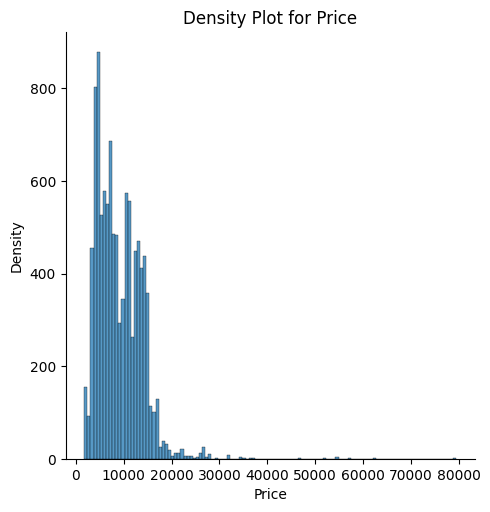

In [56]:
# check price for outliers
sns.displot(df['Price'])

# Add title and labels for clarity
plt.title('Density Plot for Price')
plt.xlabel('Price')
plt.ylabel('Density')

# Display the plot
plt.show()

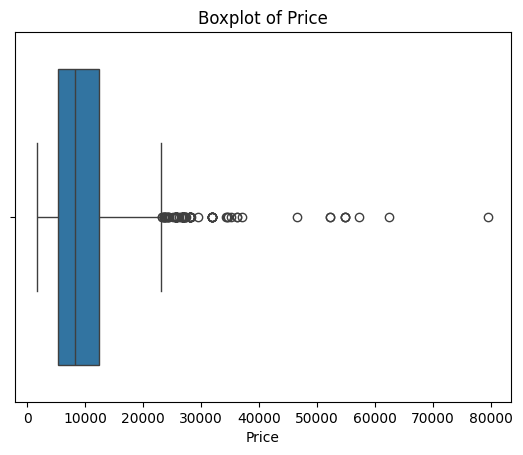

In [57]:
#boxplot
sns.boxplot(x=df["Price"])
plt.title("Boxplot of Price")
plt.show()

In [58]:
# calculate quartile for outliers

q1, q3 = np.percentile(df['Price'], [25, 75])
print(q1)
print(q3)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound)
print(df[df['Price'] < lower_bound])

print(upper_bound)
print(df[df['Price'] > upper_bound])


5224.0
12346.25
-5459.375
Empty DataFrame
Columns: [Total_Stops, Price, dept_day, dept_month, dept_hour, dept_minute, arrival_day, arrival_month, arrival_hour, arrival_minute, duration_hours, duration_minutes, Route1, Route2, Route3, Route4, Route5, Air India, GoAir, IndiGo, Jet Airways, Jet Airways Business, Multiple carriers, Multiple carriers Premium economy, SpiceJet, Trujet, Vistara, Vistara Premium economy, Chennai, Delhi, Kolkata, Mumbai, Cochin, Delhi, Hyderabad, Kolkata, New Delhi]
Index: []

[0 rows x 37 columns]
23029.625
       Total_Stops  Price  dept_day  dept_month  dept_hour  dept_minute  \
123              1  27430         1           3         23            0   
396              1  36983         1           3         12           50   
486              1  26890         1           3          8           55   
510              1  26890         1           3          7            0   
597              2  25139         6           3          9           40   
...        

In [59]:
# replace outliers with median
df['Price']=np.where(df['Price']>upper_bound,df['Price'].median(),df['Price'])

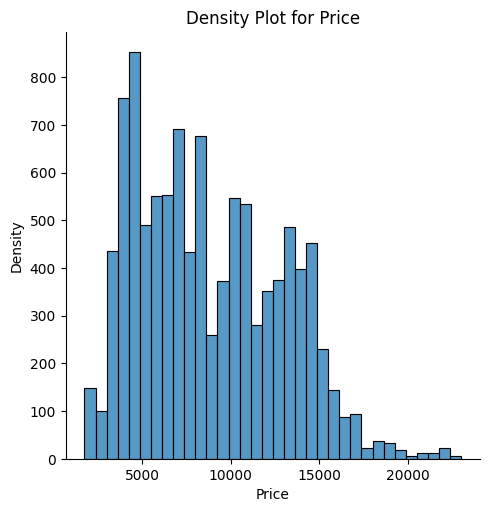

In [60]:
# check price for outliers
sns.displot(df['Price'])

# Add title and labels for clarity
plt.title('Density Plot for Price')
plt.xlabel('Price')
plt.ylabel('Density')

# Display the plot
plt.show()

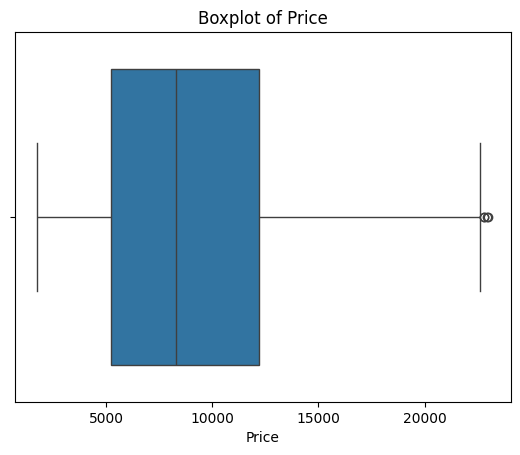

In [61]:
#boxplot
sns.boxplot(x=df["Price"])
plt.title("Boxplot of Price")
plt.show()

In [63]:
print(df.columns)

Index(['Total_Stops', 'Price', 'dept_day', 'dept_month', 'dept_hour',
       'dept_minute', 'arrival_day', 'arrival_month', 'arrival_hour',
       'arrival_minute', 'duration_hours', 'duration_minutes', 'Route1',
       'Route2', 'Route3', 'Route4', 'Route5', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')


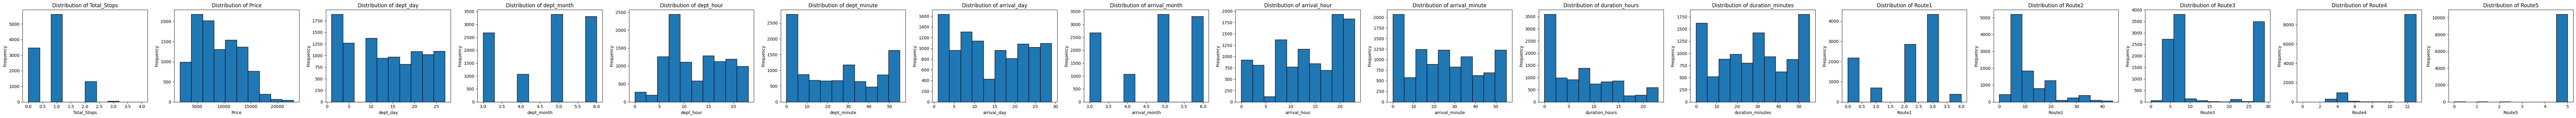

In [64]:
# Plot histograms for each column

columns_df = ['Total_Stops', 'Price', 'dept_day', 'dept_month', 'dept_hour',
       'dept_minute', 'arrival_day', 'arrival_month', 'arrival_hour',
       'arrival_minute', 'duration_hours', 'duration_minutes', 'Route1',
       'Route2', 'Route3', 'Route4', 'Route5']
num_cols = len(columns_df)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 4))

for i, col in enumerate(columns_df):
    axes[i].hist(df[col], bins=10, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [65]:
# data does not seem to follow normal distibution so min max scale 0 to 1. 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
final_df = pd.DataFrame(scaled_df, columns=df.columns)
print(final_df)

       Total_Stops     Price  dept_day  dept_month  dept_hour  dept_minute  \
0             0.00  0.100650  0.884615    0.000000   0.956522     0.363636   
1             0.50  0.277893  0.000000    0.666667   0.217391     0.909091   
2             0.50  0.570709  0.307692    1.000000   0.391304     0.454545   
3             0.25  0.209914  0.423077    0.666667   0.782609     0.090909   
4             0.25  0.543405  0.000000    0.000000   0.695652     0.909091   
...            ...       ...       ...         ...        ...          ...   
10455         0.00  0.110536  0.307692    0.333333   0.826087     1.000000   
10456         0.00  0.112325  1.000000    0.333333   0.869565     0.818182   
10457         0.00  0.257509  1.000000    0.333333   0.347826     0.363636   
10458         0.00  0.512617  0.000000    0.000000   0.478261     0.545455   
10459         0.50  0.470483  0.307692    0.666667   0.434783     1.000000   

       arrival_day  arrival_month  arrival_hour  arrival_minute

In [66]:
final_df.to_csv('after_scaling.csv', index=False)

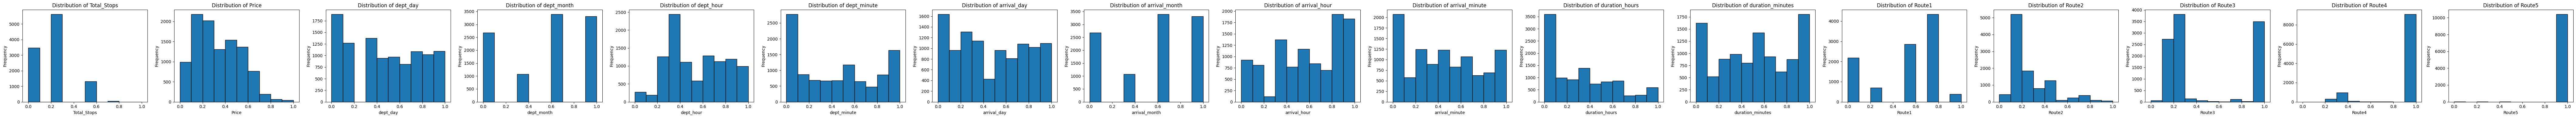

In [67]:
# Plot histograms for each column to see how distribution changed after scaling

columns_df = ['Total_Stops', 'Price', 'dept_day', 'dept_month', 'dept_hour',
       'dept_minute', 'arrival_day', 'arrival_month', 'arrival_hour',
       'arrival_minute', 'duration_hours', 'duration_minutes', 'Route1',
       'Route2', 'Route3', 'Route4', 'Route5']
num_cols = len(columns_df)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 4))

for i, col in enumerate(columns_df):
    axes[i].hist(final_df[col], bins=10, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()